### Равновесная ионизация
Проведем расчет ионизационного равновесия одноатомного газа (Калия) с помощью уравнения Саха для равновесной ионизации:
$$
    \frac{\alpha^2}{1-\alpha^2} = \frac{g_eg_i}{g_a}\left(\frac{m}{2\pi\hbar^2}\right)^{\frac{3}{2}}\frac{T^{\frac{5}{2}}}{p}\,\exp{\left(-\frac{I}{T}\right)},
$$
где $\alpha:=\frac{n_e}{n_a+n_e}$ - степень ионизации (относительная доля распавшихся атомов).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from types import SimpleNamespace
pi = np.pi

In [2]:
const = SimpleNamespace()
const.hbar = 0.659 * 1e-15
const.m_e = 0.510 * 1e6
const.g_A = 1
const.K_B = 1 * 8.617 * 1e-5

In [3]:
def saha_RHS(T, params):
    g_i, I, p = params
    global const
#     print(np.exp(-I/(T*const.K_B)))
#     print((const.m_e/(2*pi*const.hbar**2))**(3/2))
#     print((T*const.K_B)**(5/2)/p)
    return np.exp(-I/(T*const.K_B))*(2*g_i/const.g_A)*(const.m_e/(2*pi*const.hbar**2))**(3/2)*(T*const.K_B)**(5/2)/p * 1e-50

In [4]:
def to_alpha(x):
    return np.sqrt(x/(x+1))

In [18]:
T0, T1 = 3e3, 25e3
T = np.linspace(T0, T1, 201)
T_short = np.linspace(2e3, 12e3, 101)
g_i = 1
p = 1 # * 1e5 * 6.25 * 1e18
p_range = np.linspace(0.1, 1, 4)
I = {'K': 4.34, 
     'Ar': 15.76, 
     'C': 11.26, 
     'Ba': 5.121, 
     'Al': 5.986,
     'H': 13.598,
     'Ti': 6.82,
     'Mg': 7.646,
     'Si': 8.151}

### Посмотрим на графики степени ионизации для разных элементов при атмосферном давлении
Чем больше потенциал ионизации вещества газа, тем правее точка $T_*$ перегиба графика, причем $T_* \sim \frac{I}{10}$


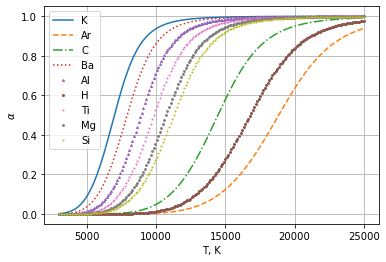

In [22]:
fig = plt.figure()

linestyles = ['-','--','-.',':','^','o','.','h','+']
for i, (name, I_name) in enumerate(I.items()):
    params = (g_i, I_name, p)
    s = saha_RHS(T, params)
    alpha_K = to_alpha(s)
    plt.plot(T, alpha_K, linestyles[i], markersize=2, label=name)

plt.xlabel('T, K')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.grid()
plt.show()

# fig.savefig('ionization_p=1atm_allelements.pdf')

### Графики степени ионизации для калия при разных давлениях
С повышением давления ионизация уменьшается, что следует из зависимости правой части формулы Саха от давления (давление находится в знаменателе), поскольку функция $f(x)=\sqrt{x/(x+1)}$ возрастающая.

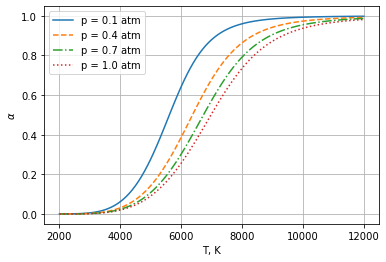

In [24]:
fig = plt.figure()
linestyles1 = ['-','--','-.',':']

for style, p_this in zip(linestyles1, p_range):
    params = (g_i, I['K'], p_this)
    s = saha_RHS(T_short, params)
    alpha_K = to_alpha(s)
    plt.plot(T_short, alpha_K, style, label=f'p = {p_this} atm')

plt.xlabel('T, K')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.grid()
plt.show()

# fig.savefig('ionization_p=[0.1, 0.4, 0.7, 1]atm_K.pdf')